# Hello GM!
<a id="Back-to-Top"></a>
***

## Table of Contents

1. [Project Walkthrough](#Project-Walkthrough)
 1. [Executive Summary](#Executive-Summary)
 1. [Data Acquisition](#Data-Acquisition) 
 1. [Data Preparation](#Data-Preparation)
 1. [Exploration](#Exploration)
 1. [Modeling](#Modeling)
 1. [Conclusion](#Conclusion)
 1. [Questions](#Questions)

#### <a id="A-bit-about-me"></a>
---

#### <a id="Project-Walkthrough"></a>

# Project: State of the U.S. EV Charging Network
By Jeff Akins

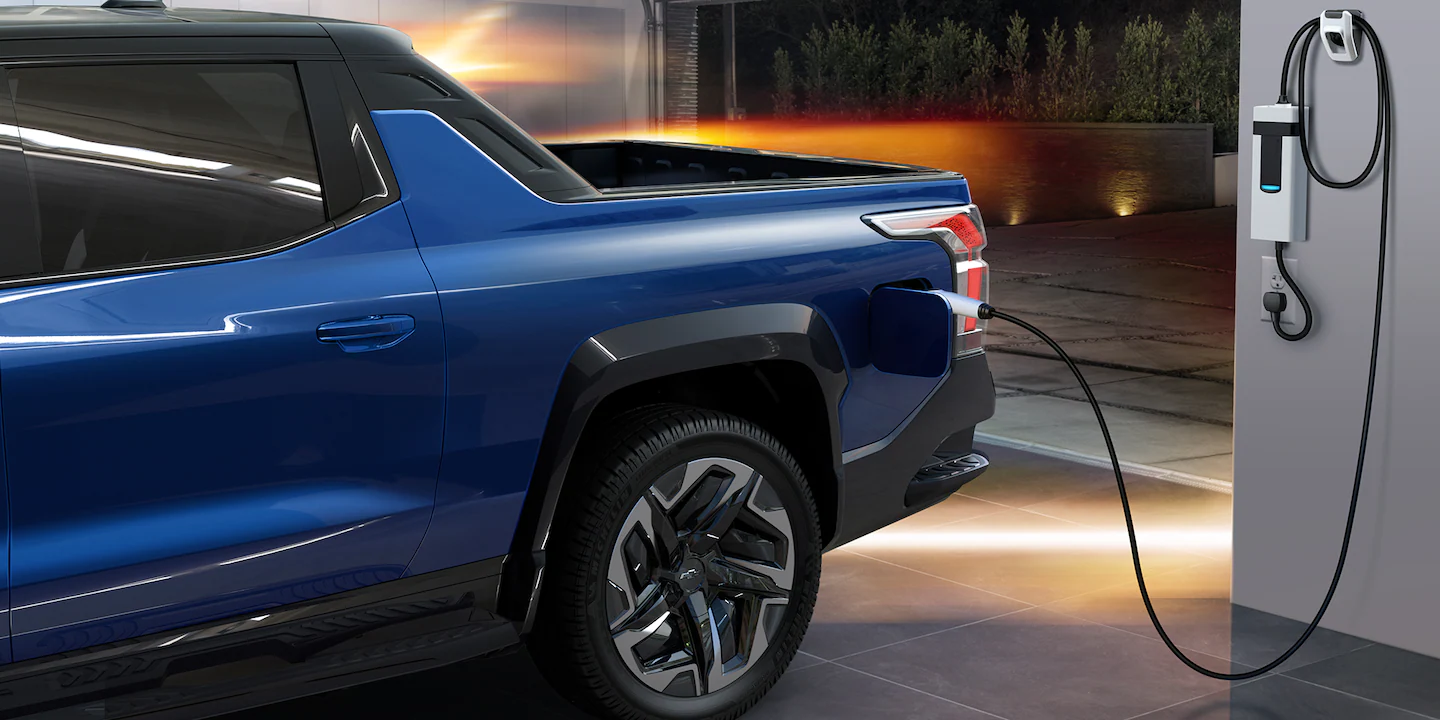

## Goal: Understand the Currnet State of the Electric Vehicle Charging Network within the U.S.
The world's methods of transportation are evolving, not only here in the United States, but globally. The EU recently proposed a mandate for all new vehicles to be emissions free after 2035. In the U.S., the Biden administrations wants half of all new vehicles to be purely electric by 2030. Regardless of the mandates, buyers may be choosing to purchase EVs over their traditional internal combustion engine (ICE) counterparts in the upcoming years. Many new EVs are surpassing comparable ICE vehicles in both speed, handling, and overall capability, and new models of EVs are being introduced on a regular basis. No longer do you have to choose between the environment or the car that you want to drive.

So, with all of these new EV coming online, is the charging infrastructure keeping up? Buyers may be asking themselves, how many charging stations will be nearby if I need one? If I decide to go on a road trip, how difficult will it be to find an open charging station? I will try and answer these questions using a bit of machine learning to show the state of the charging networks now and the predicted growth over the next several years.

#### <a id="Executive-Summary"></a>

## Executive Summary
Current State of the EV Charging Network within the U.S.
- First Charging Station Opened in August of 1995 at the LA Convention Center
- Exponential Growth began in 2010
- Number of Charging Stations as of July 2021: 47,006
- Number of Charging Ports: 120,454
 - 73,209 in the last two years
- Predicted Growth over the next two years: 90,438 charging ports (plugs)

##### Imports:

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import pandas.plotting

import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL

import tensorflow as tf
from tensorflow import keras

import modeling as md
import wrangle as w
import warnings
warnings.filterwarnings('ignore')

### [Back to Top](#Back-to-Top)
<a id="data_acquisition"></a>

## Data Acquisition: 
You can find the original U.S. Department of Energy dataset file [here](https://catalog.data.gov/dataset/alternative-fueling-station-locations-422f2/resource/341957d8-daf6-4a38-ab1d-8ec1bc21cfb9) on data.gov.

Note: 
 - The dataset includes EV Charging Stations built through July 2021.
 - If the file hase been updated, then it may have a dfferent name from the one used in this notebook. You will need to update the name below in order for the notebook to run. 

In [2]:
# CSV File from 
ev_origin_file = pd.read_csv('alt_fuel_stations_Jul_29_2021.csv')
pd.set_option('display.max_columns', None)
ev_origin_file

Fuel Type Code                                       Station Name  \
0                CNG               Spire - Montgomery Operations Center   
1                CNG                                PS Energy - Atlanta   
2                CNG       Metropolitan Atlanta Rapid Transit Authority   
3                CNG                              United Parcel Service   
4                CNG  Clean Energy - Texas Department of Transportation   
...              ...                                                ...   
56795            E85                                  Sheetz Store #713   
56796            E85                                    Kwik Trip #1062   
56797            E85                                                 76   
56798            E85                                Lafferty Race Fuels   
56799            E85                                    Kwik Star #1107   

             Street Address  \
0          2951 Chestnut St   
1          340 Whitehall St   
2       2424 Piedmont Rd NE   
3      270 Marvin Miller Dr   
4       7721A Washington St   
...                     ...   
56795   10515 Sharpsburg Pk   
56796  1580 E Washington St   
56797        675 N Lake Ave   
56798       8800 S Osage St   
56799      1900 16th Ave SW   

                                 Intersection Directions          City State  \
0                                                    NaN    Montgomery    AL   
1      From I-7585 N, exit 91 to Central Ave, left on...       Atlanta    GA   
2                                                    NaN       Atlanta    GA   
3                                                    NaN       Atlanta    GA   
4      I-10, Washington Ave exit, 1.5 blocks to the s...       Houston    TX   
...                                                  ...           ...   ...   
56795                                                NaN    Hagerstown    MD   
56796                                                NaN     West Bend    WI   
56797                                                NaN      Pasadena    CA   
56798                                                NaN      Amarillo    TX   
56799                                                NaN  Cedar Rapids    IA   

         ZIP  Plus4 Station Phone Status Code Expected Date  \
0      36107    NaN           NaN           E           NaN   
1      30303    NaN  770-350-3000           E           NaN   
2      30324    NaN           NaN           E           NaN   
3      30336    NaN           NaN           E           NaN   
4      77007    NaN  866-809-4869           E           NaN   
...      ...    ...           ...         ...           ...   
56795  21740    NaN  240-513-7047           E           NaN   
56796  53095    NaN  262-334-0999           E           NaN   
56797  91101    NaN  626-578-1519           E           NaN   
56798  79118    NaN  806-674-7536           E           NaN   
56799  52404    NaN  319-362-3188           E           NaN   

                 Groups With Access Code  \
0                                Private   
1         Public - Card key at all times   
2              Private - Government only   
3                                Private   
4      Public - Credit card at all times   
...                                  ...   
56795                             Public   
56796                             Public   
56797                             Public   
56798                             Public   
56799                             Public   

                                        Access Days Time  \
0                                                    NaN   
1                                         24 hours daily   
2                                                    NaN   
3                                                    NaN   
4      24 hours daily; call 866-809-4869 for Clean En...   
...                                                  ...   
56795                                     24 hours daily   
56796

In [3]:
ev_origin_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56800 entries, 0 to 56799
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    56800 non-null  object 
 1   Station Name                      56800 non-null  object 
 2   Street Address                    56798 non-null  object 
 3   Intersection Directions           4827 non-null   object 
 4   City                              56800 non-null  object 
 5   State                             56800 non-null  object 
 6   ZIP                               56800 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     52437 non-null  object 
 9   Status Code                       56800 non-null  object 
 10  Expected Date                     376 non-null    object 
 11  Groups With Access Code           56800 non-null  object 
 12  Acce

### [Back to Top](#Back-to-Top)
<a id="Data-Preparation"></a>

## Data Preparation:
The following steps were taken to clean the data:
- Dropped all columns and rows that were not "electric" charging stations
- Dropped all columns with less than 1000 non-null values
- Changed the pricing column to only include 'free' or 'cost' in the rows (changed 42k nulls to cost)
- Fill EV Network nulls with most common 'non network' label
- Added values for 2 missing longitude values based on city location
- Renamed columns for ease of referencing and use with pandas
- Replaced 'Public w/descriptor' with just 'Public' in group_access_code column
- Replaced 'Private w/descriptor' with just 'Private' in group_access_code column
- Dropped stations (rows) that are labeled as 'planned' and not yet accessible in the group_access_code column
- Converted date columns to pandas datetime type
- Added a column for year that the charging station was opened
- Converted all Charger Type (count) columns into 'int' type and filled nulls with 0
- Created a column that summed the total number of chargers at each station
- Sorted the dataframe by 'open date'
- Created a column for a rolling total of chargers as stations were opened

Results are below:

In [4]:
ev_csv = 'alt_fuel_stations_Jul_29_2021.csv'
ev_df = w.clean_ev(ev_csv)
ev_df.head(3)

fuel_code                    station_name             address         city  \
0      ELEC   Los Angeles Convention Center  1201 S Figueroa St  Los Angeles   
1      ELEC    State Capitol Parking Garage        1303 10th St   Sacramento   
2      ELEC  California Air Resources Board    9530 Telstar Ave     El Monte   

  state    zip group_access_code  level1_evse_num  level2_evse_num  \
0    CA  90015            Public                0               12   
1    CA  95814           Private                0                9   
2    CA  91731            Public                0                3   

   ev_dc_fast_count     ev_network        lat        long update_date  \
0                 0  Non-Networked  34.040539 -118.271387  2021-03-11   
1                 0  Non-Networked  38.576769 -121.495022  2021-03-11   
2                 0  Non-Networked  34.068720 -118.064000  2021-03-11   

   open_date connector_type pricing  year_opened  total_chargers  \
0 1995-08-30          J1772    Cost         1995              12   
1 1996-10-15          J1772    Cost         1996               9   
2 1996-10-15          J1772    Free         1996               3   

   rolling_total_chargers  
0                      12  
1                      21  
2                      24

In [5]:
ev_df.tail(3)

fuel_code               station_name            address         city  \
47003      ELEC          Figueroa Plaza P3  201 N Figueroa St  Los Angeles   
47004      ELEC  6TH AVENUE WEST STATION 1     350 Indiana St       Golden   
47005      ELEC          Figueroa Plaza P4  201 N Figueroa St  Los Angeles   

      state    zip group_access_code  level1_evse_num  level2_evse_num  \
47003    CA  90012            Public                0                3   
47004    CO  80401            Public                0                2   
47005    CA  90012            Public                0               23   

       ev_dc_fast_count           ev_network        lat        long  \
47003                 0            Greenlots  34.059093 -118.251429   
47004                 0  ChargePoint Network  39.720848 -105.164920   
47005                 0            Greenlots  34.059093 -118.251429   

      update_date  open_date connector_type pricing  year_opened  \
47003  2021-07-29 2021-07-29          J1772    Cost         2021   
47004  2021-07-29 2021-07-29          J1772    Cost         2021   
47005  2021-07-29 2021-07-29          J1772    Cost         2021   

       total_chargers  rolling_total_chargers  
47003               3                  120429  
47004               2                  120431  
47005              23                  120454

In [6]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47006 entries, 0 to 47005
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fuel_code               47006 non-null  object        
 1   station_name            47006 non-null  object        
 2   address                 47006 non-null  object        
 3   city                    47006 non-null  object        
 4   state                   47006 non-null  object        
 5   zip                     47006 non-null  object        
 6   group_access_code       47006 non-null  object        
 7   level1_evse_num         47006 non-null  int64         
 8   level2_evse_num         47006 non-null  int64         
 9   ev_dc_fast_count        47006 non-null  int64         
 10  ev_network              47006 non-null  object        
 11  lat                     47006 non-null  float64       
 12  long                    47006 non-null  float6

### Initial Plots:
To gain a visual understanding of the overall dataset. 

For the below graph:
- Each dot represents the number of actual charging spots (i.e. number of plugs) that were opened on a specific date. 

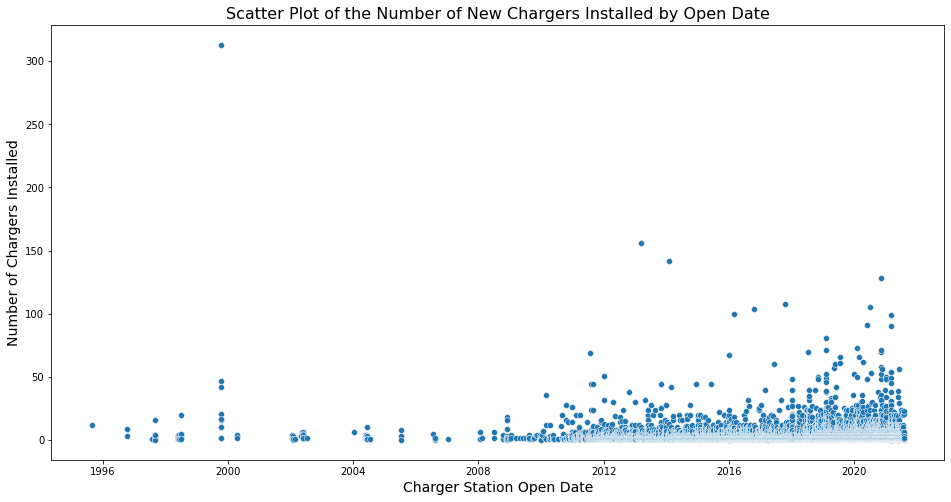

In [7]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='open_date', y='total_chargers', data=ev_df)
plt.title('Scatter Plot of the Number of New Chargers Installed by Open Date', size=16)
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Number of Chargers Installed', size=14)
plt.show()

##### Plot of the Cumulative Sum of EV Charging Stations over Time
The below graph shows the total number of charging stations that have been built in the US over time.

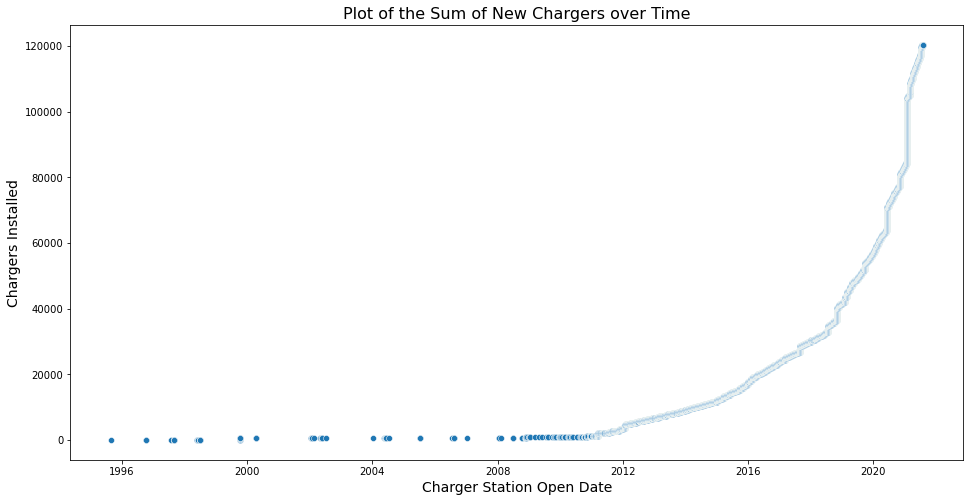

In [8]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='open_date', y='rolling_total_chargers', data=ev_df)
plt.title('Plot of the Sum of New Chargers over Time', size=16)
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Chargers Installed', size=14)
plt.show()

##### Plot of EV Charging Station Locations
Below is a visual representation of the locations of all current EV Charging stations within the US based on their Lat/Long location.

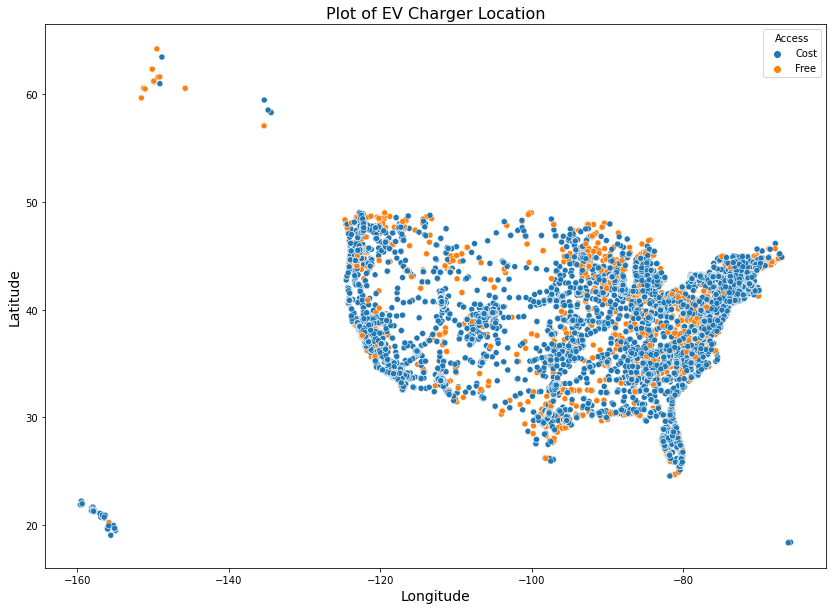

In [9]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='long', y='lat',hue='pricing', data=ev_df)
plt.title('Plot of EV Charger Location', size=16)
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)
plt.legend(title='Access')
plt.show()

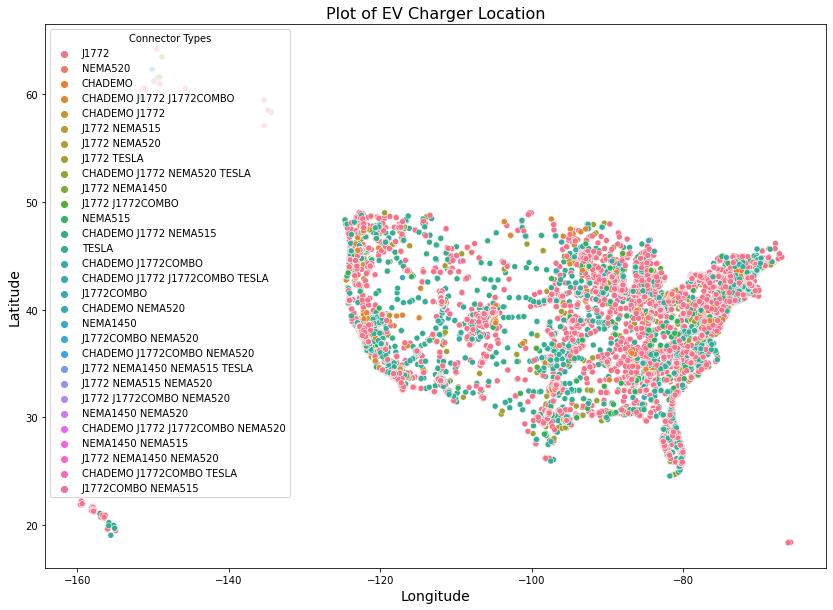

In [10]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='long', y='lat',hue='connector_type', data=ev_df)
plt.title('Plot of EV Charger Location', size=16)
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)
plt.legend(title='Connector Types')
plt.show()

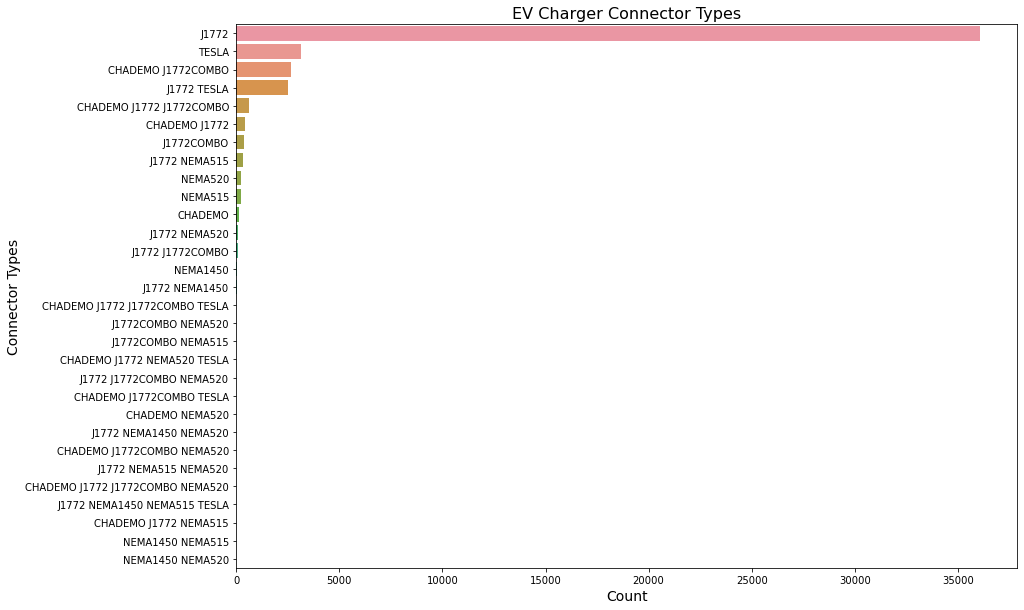

In [11]:
connectors = pd.DataFrame(ev_df.connector_type.value_counts())
plt.figure(figsize=(14, 10))
sns.barplot(x='connector_type', y=connectors.index , data=connectors)
plt.title('EV Charger Connector Types', size=16)
plt.xlabel('Count', size=14)
plt.ylabel('Connector Types', size=14)
plt.show()

### [Back to Top](#Back-to-Top)
<a id="Exploration"></a>
***

## Exploration:
My goal is to predict the increase of charging stations several years into the future. Therefore, I reduced my dataframe to only include the open_date and total_chargers for the exploration phase. I also only included the data from 2010 and beyond since most of the charger production has occurred since then. 

#### ![](https://www.chevrolet.com/electric/s3/uploads/chevrolet/22_CHBO_45008_XL_dcddd6f4b9.jpg?imwidth=1024)

In [12]:
# Reducing the dataframe to only the open date and total chargers columns
ev = ev_df[['open_date', 'total_chargers']]

In [13]:
# Setting the date as the index
ev = ev.set_index('open_date')

In [14]:
# To include only the dates since 2010
ev = ev['2010':]

In [15]:
# Resampling to sum every quarter
ev = ev.resample('3M').sum()

In [16]:
ev.head()

total_chargers
open_date                 
2010-01-31              19
2010-04-30              70
2010-07-31              14
2010-10-31             111
2011-01-31             141

##### Train, Validate, Test Split

In [17]:
# compute num of rows that are 60% of total rows and assign to variable train_size
train_size = int(len(ev) * .6)

# compute num of rows that are 20% of total rows and assign to variable validate_size
validate_size = int(len(ev) * .2)

# make test_size the number of rows remaining (test_size = total # of rows - train_size - validate_size)
test_size = int(len(ev) - train_size - validate_size)

# compute the row number at which the switch from validate to test happens. 
validate_end_index = train_size + validate_size

# split into train, validation, test
train = ev[: train_size]
validate = ev[train_size : validate_end_index]
test = ev[validate_end_index : ]

In [18]:
# To see the split:
print('Train:', len(train), ' Validate:', len(validate), ' Test:', len(test))

Train: 28  Validate: 9  Test: 10


##### Plot of Train, Validate, and Test
- The Train dataset begins in 2010 an goes through 2016.
- Validate is from 2017 to 2019
- Test covers 2019 to 2021

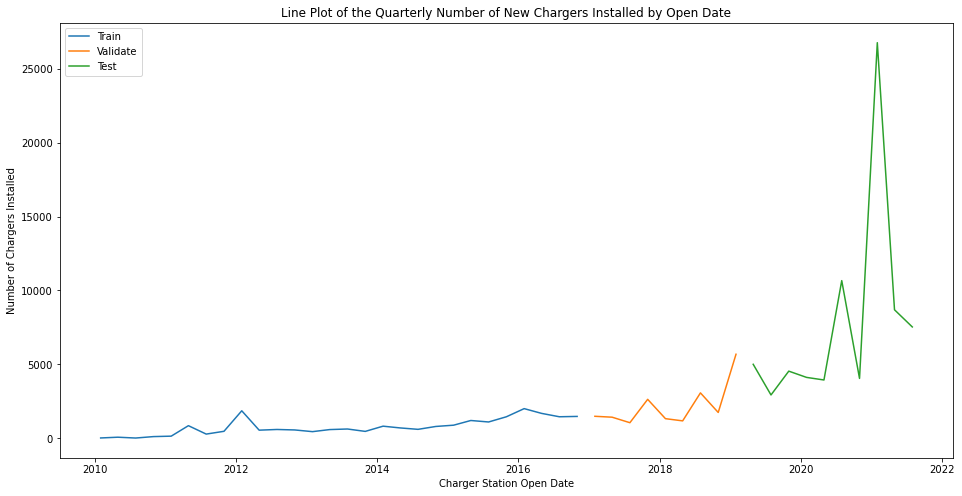

In [19]:
plt.figure(figsize=(16,8))
sns.lineplot(x='open_date', y='total_chargers', data=train)
sns.lineplot(x='open_date', y='total_chargers', data=validate)
sns.lineplot(x='open_date', y='total_chargers', data=test)
plt.title('Line Plot of the Quarterly Number of New Chargers Installed by Open Date')
plt.legend(labels=['Train', 'Validate', 'Test'])
plt.xlabel('Charger Station Open Date')
plt.ylabel('Number of Chargers Installed')
plt.show()

##### Findings: 
Most of the EV charging stations within the US have been added since 2010 with an exponential increase over the last five years.
***
  

### Exploring Trends and Seasonal Decomposition within Train:
Below I used statsmodels' seasonal decomposition function to explore overall trends and seasonal components of the train dataset.
- 'y' is the data series that has been decomposed
- 'trend' is the trend component of the data series
- 'seasonal' is the seasonal component of the data series
- 'resid' is the residual component of the data series

In [20]:
# Exporing Trend verses Seasonality
result = sm.tsa.seasonal_decompose(train)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y    trend    seasonal       resid
open_date                                         
2010-01-31   19.0      NaN  206.135417         NaN
2010-04-30   70.0      NaN   50.218750         NaN
2010-07-31   14.0   68.750 -143.885417   89.135417
2010-10-31  111.0  181.500 -112.468750   41.968750
2011-01-31  141.0  312.375  206.135417 -377.510417

##### Plot of Trends, seasonality, and the residual 

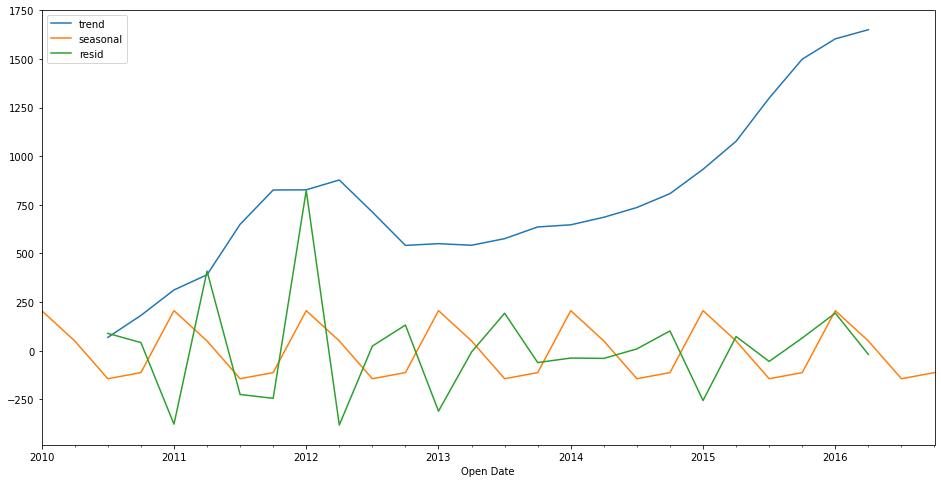

In [21]:
decomposition.iloc[:, 1:].plot(figsize=(16,8))
plt.xlabel('Open Date')
plt.show()

##### Findings: 
Overall, the trend increases sharply from 2010 to 2012 then decreases in 2013 before rising again through 2015 at the end of the train dataset. The seasonal decomposition function is indicating some seasonality dues to the fluctuation from 2011 to 2013 but the residual indicates a tapper of this after 2013. 


### [Back to Top](#Back-to-Top)
<a id="Modeling"></a>
***

## Modeling:

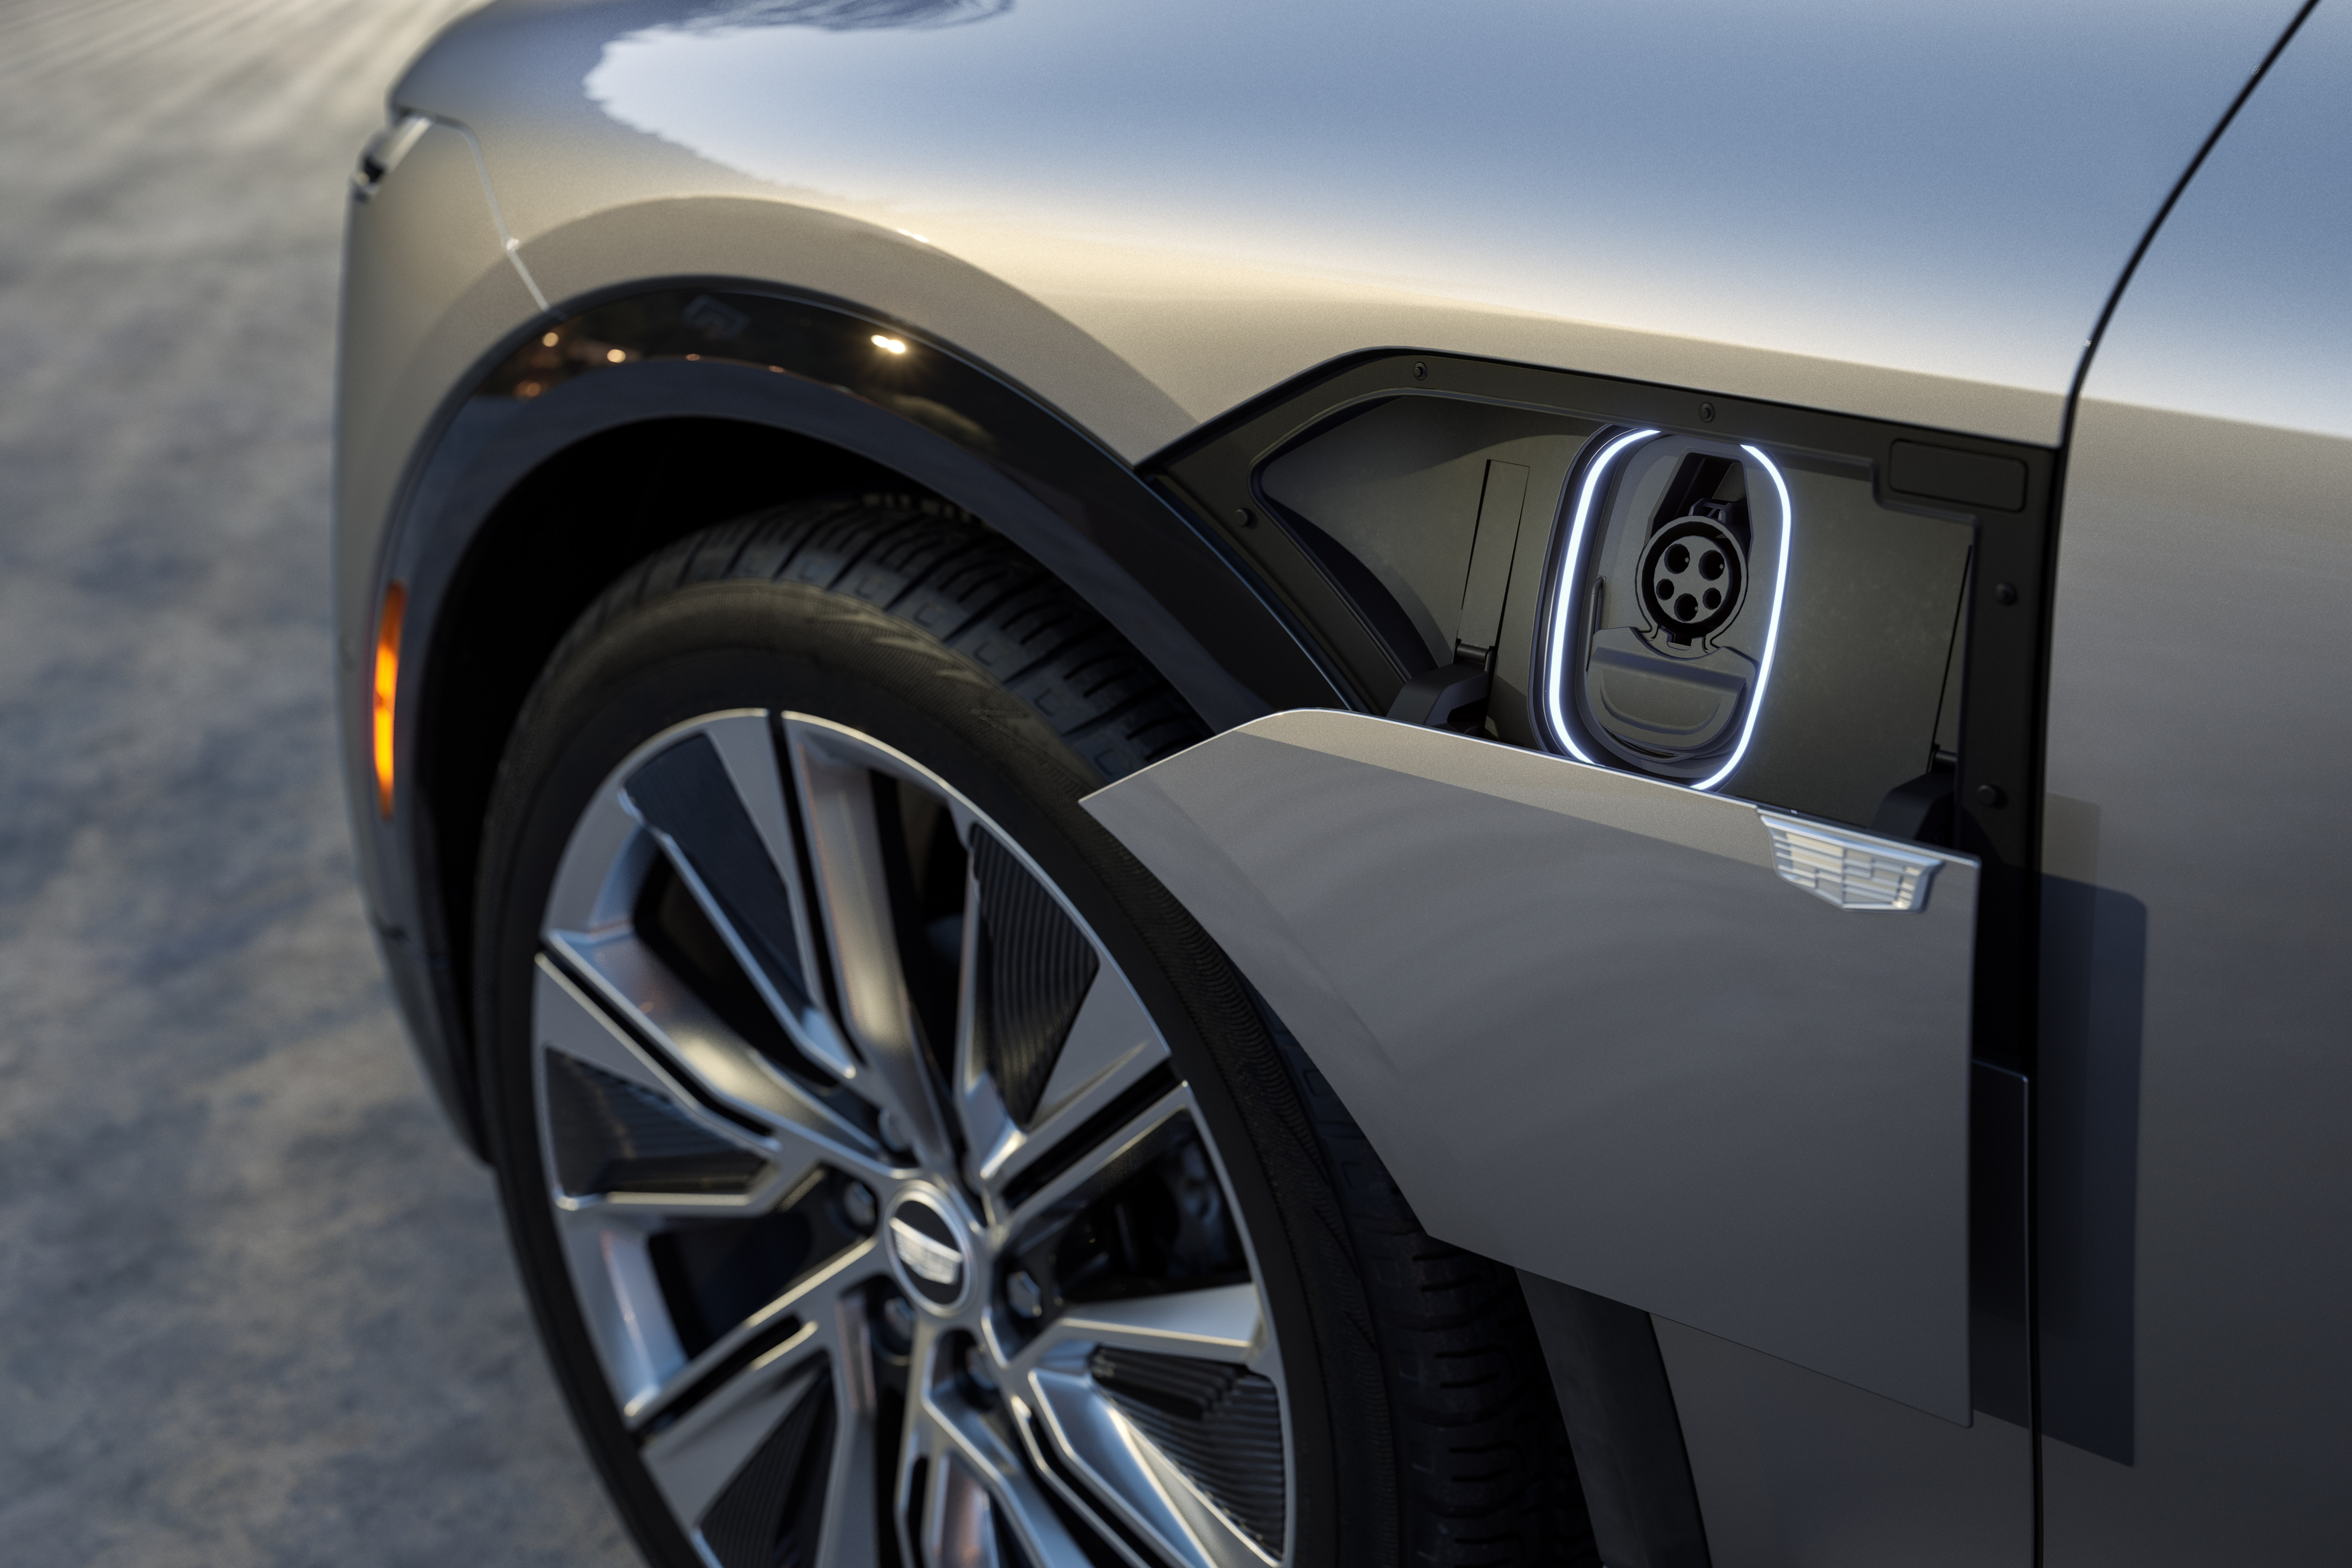

### Baseline:

In [22]:
# Baseline prediction using the average quarterly EV Charger Installations
average_ev = round(train.total_chargers.mean(), 2)

# Setting the average to the validate index
yhat1 = pd.DataFrame({'avg_ev_charger': [average_ev]}, index = validate.index)
yhat1.head(3)

avg_ev_charger
open_date                 
2017-01-31          778.32
2017-04-30          778.32
2017-07-31          778.32

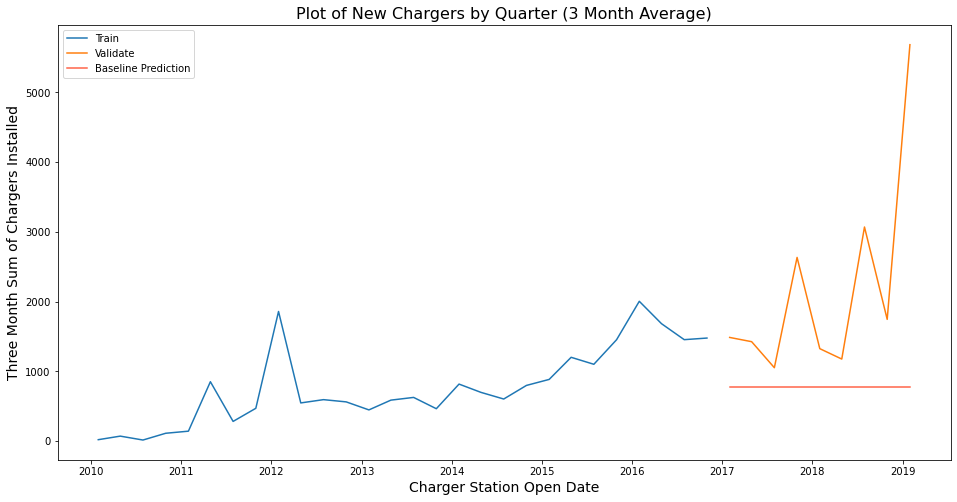

In [23]:
plt.figure(figsize=(16,8))
sns.lineplot(x='open_date', y='total_chargers', data=train)
sns.lineplot(x='open_date', y='total_chargers', data=validate)
sns.lineplot(x=yhat1.index, y='avg_ev_charger', data=yhat1, color='tomato')

plt.title('Plot of New Chargers by Quarter (3 Month Average)', size=16)
plt.legend(labels=['Train', 'Validate', "Baseline Prediction"])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

##### RMSE results of the Baseline Model

In [24]:
eval_df = pd.DataFrame()
eval_df = md.append_eval_df(eval_df, 'Baseline', 'Quarterly Sum of New Chargers', validate, yhat1)
eval_df

Model Type                Target Variable    RMSE
0   Baseline  Quarterly Sum of New Chargers  1975.0

#### Due to the exponential increase in chargers being built over time, we can likely do better with the Holt model and the Holt-Winters Exponential Smoothing Model. The results are below.

### Holt Model:
Forecast equation:
y<sub>t+h|t</sub> = ℓ<sub>t</sub> + hb<sub>t</sub>

Level equation:
ℓ<sub>t</sub> = αy<sub>t</sub> + (1−α)(ℓ<sub>t−1</sub>+b<sub>t−1</sub>)

Trend equation:
b<sub>t</sub> = β<sup>∗</sup>(ℓ<sub>t</sub>−ℓ<sub>t−1</sub>) + (1−β<sup>∗</sup>)b<sub>t−1</sub>

  
- ℓt denotes an estimate of the level of the series at time t
- α is the smoothing parameter for the level,  0≤α≤1
- β<sup>∗</sup> is the smoothing parameter for the trend,  0≤β<sup>∗</sup>≤1
 
t = open_date\
y = total_charges\
α = smoothing_level: Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values\
β<sup>∗</sup> = smoothing_slope: Values closer to 1 will give greater weight to recent slope/values


In [25]:
model = Holt(train['total_chargers'], exponential = False)
model = model.fit(smoothing_level = .1, 
                  smoothing_slope = .5)
yhat_items = model.predict(start = validate.index[0], 
                           end = validate.index[-1])
yhat = round(yhat_items, 2)

In [26]:
yhat = pd.DataFrame(yhat, columns=['total_chargers'])

##### Plot of the Holt Model Prediction vs the Validate Dataset

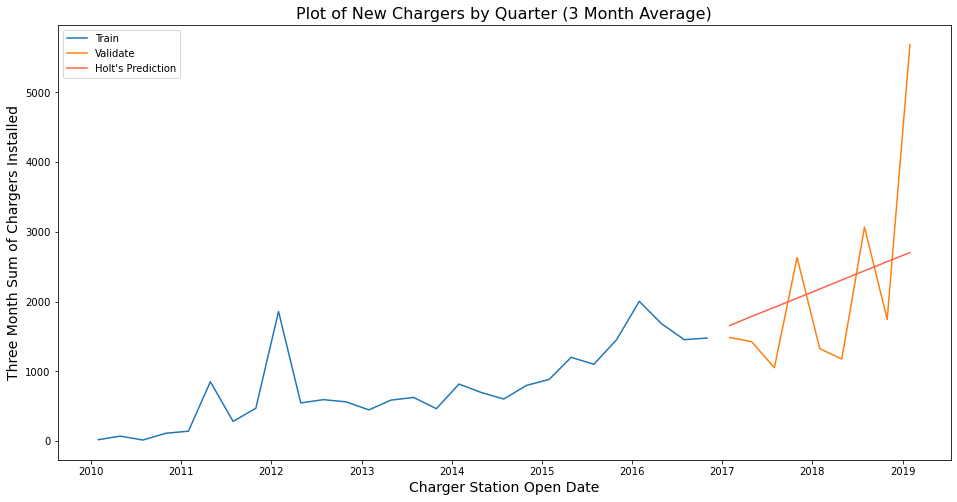

In [27]:
plt.figure(figsize=(16,8))
sns.lineplot(x='open_date', y='total_chargers', data=train)
sns.lineplot(x='open_date', y='total_chargers', data=validate)
sns.lineplot(x=yhat.index, y='total_chargers', data=yhat, color='tomato')

plt.title('Plot of New Chargers by Quarter (3 Month Average)', size=16)
plt.legend(labels=['Train', 'Validate', "Holt's Prediction"])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

##### RMSE results of the Holt Model

In [28]:
eval_df = md.append_eval_df(eval_df, 'Holt', 'Quarterly Sum of New Chargers', validate, yhat)
eval_df

Model Type                Target Variable    RMSE
0   Baseline  Quarterly Sum of New Chargers  1975.0
1       Holt  Quarterly Sum of New Chargers  1212.0

### Holt Model w/ Exp Smoothing:
Forecast equation:
y<sub>t+h|t</sub> = ℓ<sub>t</sub> + hb<sub>t</sub>

Level equation:
ℓ<sub>t</sub> = αy<sub>t</sub> + (1−α)(ℓ<sub>t−1</sub>+b<sub>t−1</sub>)

Trend equation:
b<sub>t</sub> = β<sup>∗</sup>(ℓ<sub>t</sub>−ℓ<sub>t−1</sub>) + (1−β<sup>∗</sup>)b<sub>t−1</sub>

t = open_date\
y = total_charges\
α = smoothing_slope\
β<sup>∗</sup> = smoothing_level

- α smoothing_level: smoothing parameter for mean. Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values.
- β smoothing_slope: smoothing parameter for the slope. Values closer to 1 will give greater weight to recent slope/values.

In [29]:
model = Holt(train['total_chargers'], exponential = True)
model = model.fit(smoothing_level = .3, 
                  smoothing_slope = .3, 
                  optimized = False)
yhat_items = model.predict(start = validate.index[0], 
                           end = validate.index[-1])
yhat = round(yhat_items, 2)

In [30]:
yhat = pd.DataFrame(yhat, columns=['total_chargers'])

##### Plot of the Holt Model Prediction vs the Validate Dataset

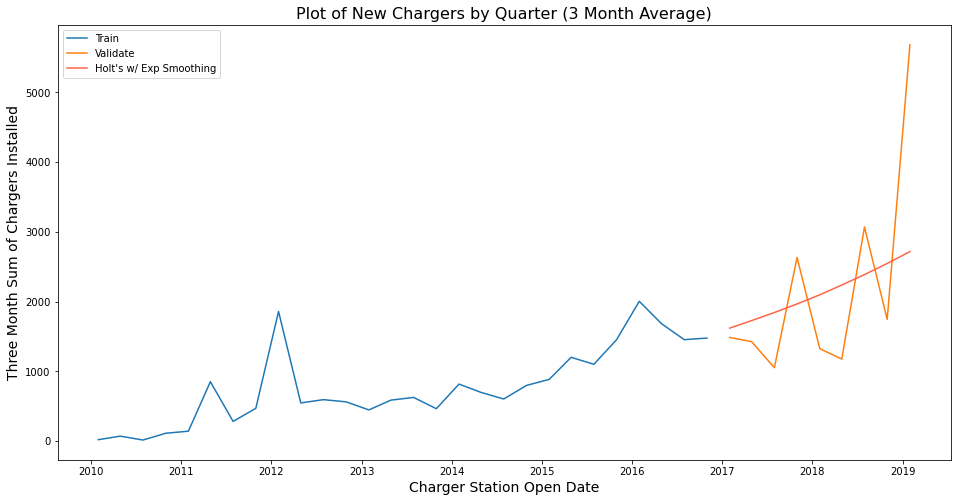

In [31]:
plt.figure(figsize=(16,8))
sns.lineplot(x='open_date', y='total_chargers', data=train)
sns.lineplot(x='open_date', y='total_chargers', data=validate)
sns.lineplot(x=yhat.index, y='total_chargers', data=yhat, color='tomato')

plt.title('Plot of New Chargers by Quarter (3 Month Average)', size=16)
plt.legend(labels=['Train', 'Validate', "Holt's w/ Exp Smoothing"])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

##### RMSE results of the Holt Model

In [32]:
eval_df = md.append_eval_df(eval_df, 'Holt w/ Exp Smoothing', 'Quarterly Sum of New Chargers', validate, yhat)
eval_df

Model Type                Target Variable    RMSE
0               Baseline  Quarterly Sum of New Chargers  1975.0
1                   Holt  Quarterly Sum of New Chargers  1212.0
2  Holt w/ Exp Smoothing  Quarterly Sum of New Chargers  1193.0

### Holt-Winters Exponential Smoothing Model
The basic equations for Holt-Winters method are given by:

Overall Smoothing: S<sub>t</sub> = αy<sub>t</sub>/I<sub>t−L</sub> + (1−α)(S<sub>t−1</sub>+b<sub>t−1</sub>)  

Trend Smoothing: b<sub>t</sub> = γ(S<sub>t</sub>−S<sub>t−1</sub>) + (1−γ)b<sub>t−1</sub>  

Seasonal Smoothing: I<sub>t</sub> = βy<sub>t</sub>/S<sub>t</sub> + (1−β)I<sub>t−L</sub>  

Forecast: F<sub>t+m</sub> = (S<sub>t</sub> + mb<sub>t</sub>)I<sub>t−L+m</sub>  

Where:

- y is the observation
- S is the smoothed observation
- b is the trend factor
- I is the seasonal index
- F is the forecast at m periods ahead
- t is an index denoting a time period and α, β, and γ are constants that must be estimated in such a way that the MSE of the error is minimized. 

- α smoothing_level: smoothing parameter for mean. Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values.
- β smoothing_slope: smoothing parameter for the slope. Values closer to 1 will give greater weight to recent slope/values.

In [33]:
model = ExponentialSmoothing(train['total_chargers'], trend='mul')
model = model.fit(smoothing_level = 1, 
                  smoothing_slope = .2,
                  optimized = False,
                  damping_trend=1)
yhat_items = model.predict(start = validate.index[0], 
                           end = validate.index[-1])
yhat = round(yhat_items, 2)

In [34]:
yhat = pd.DataFrame(yhat, columns=['total_chargers'])

##### Plot of Holt-Winters Exponential Smoothing Model

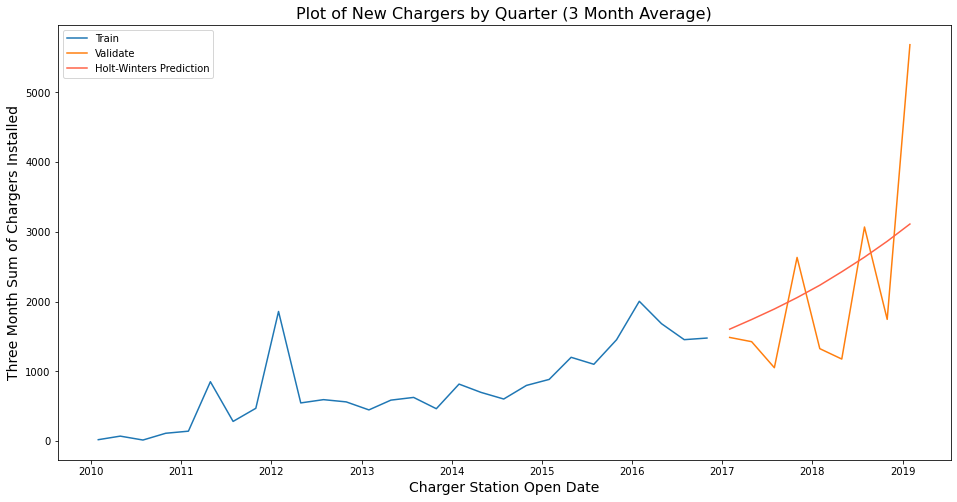

In [35]:
plt.figure(figsize=(16,8))
sns.lineplot(x='open_date', y='total_chargers', data=train)
sns.lineplot(x='open_date', y='total_chargers', data=validate)
sns.lineplot(x=yhat.index, y='total_chargers', data=yhat, color='tomato')

plt.title('Plot of New Chargers by Quarter (3 Month Average)', size=16)
plt.legend(labels=['Train', 'Validate', "Holt-Winters Prediction"])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

In [36]:
eval_df = md.append_eval_df(eval_df, 'Holt-Winters Exp Smoothing', 'Quarterly Sum of New Chargers', validate, yhat)
eval_df

Model Type                Target Variable    RMSE
0                    Baseline  Quarterly Sum of New Chargers  1975.0
1                        Holt  Quarterly Sum of New Chargers  1212.0
2       Holt w/ Exp Smoothing  Quarterly Sum of New Chargers  1193.0
3  Holt-Winters Exp Smoothing  Quarterly Sum of New Chargers  1135.0

### Exponential Smoothing with Seasonal Trend

In [37]:
model = ExponentialSmoothing(
    train['total_chargers'],
    seasonal_periods=4,
    trend="mul",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated"
)
model = model.fit(smoothing_level = .8, 
                  smoothing_slope = .2,
                  smoothing_seasonal=None,
                  damping_trend=None)
yhat_items = model.predict(start = validate.index[0], 
                           end = validate.index[-1])
yhat = round(yhat_items, 2)

In [38]:
yhat = pd.DataFrame(yhat, columns=['total_chargers'])

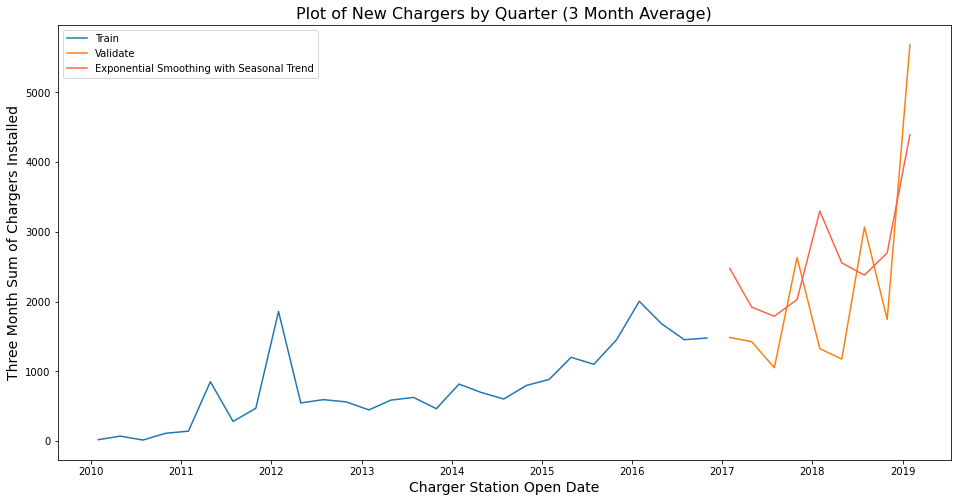

In [39]:
plt.figure(figsize=(16,8))
sns.lineplot(x='open_date', y='total_chargers', data=train)
sns.lineplot(x='open_date', y='total_chargers', data=validate)
sns.lineplot(x=yhat.index, y='total_chargers', data=yhat, color='tomato')

plt.title('Plot of New Chargers by Quarter (3 Month Average)', size=16)
plt.legend(labels=['Train', 'Validate', "Exponential Smoothing with Seasonal Trend"])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

In [40]:
eval_df = md.append_eval_df(eval_df, 'Exp Smoothing w/ Seasonal Trend', 'Quarterly Sum of New Chargers', validate, yhat)
eval_df

Model Type                Target Variable    RMSE
0                         Baseline  Quarterly Sum of New Chargers  1975.0
1                             Holt  Quarterly Sum of New Chargers  1212.0
2            Holt w/ Exp Smoothing  Quarterly Sum of New Chargers  1193.0
3       Holt-Winters Exp Smoothing  Quarterly Sum of New Chargers  1135.0
4  Exp Smoothing w/ Seasonal Trend  Quarterly Sum of New Chargers  1105.0

## Test

##### Resplitting the Data into Train and Test

In [41]:
# compute num of rows that are 80% of total rows and assign to variable train_size
train_size = int(len(ev) * .8)

# split into train and test
train = ev[: train_size]
test = ev[train_size : ]

In [42]:
# To see the split:
print('Train:', len(train), ' Test:', len(test))

Train: 37  Test: 10


### Modeling using Holt-Winters Exponential Smoothing Model with Seasonal Trend

In [43]:
model = ExponentialSmoothing(
    train['total_chargers'],
    seasonal_periods=4,
    trend="mul",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated"
)
model = model.fit(smoothing_level = .5, 
                  smoothing_slope = .2,
                  smoothing_seasonal=None,
                  damping_trend=None)
yhat_items = model.predict(start = test.index[0], 
                           end = test.index[-1])
yhat = round(yhat_items, 2)

In [44]:
yhat = pd.DataFrame(yhat, columns=['total_chargers'])

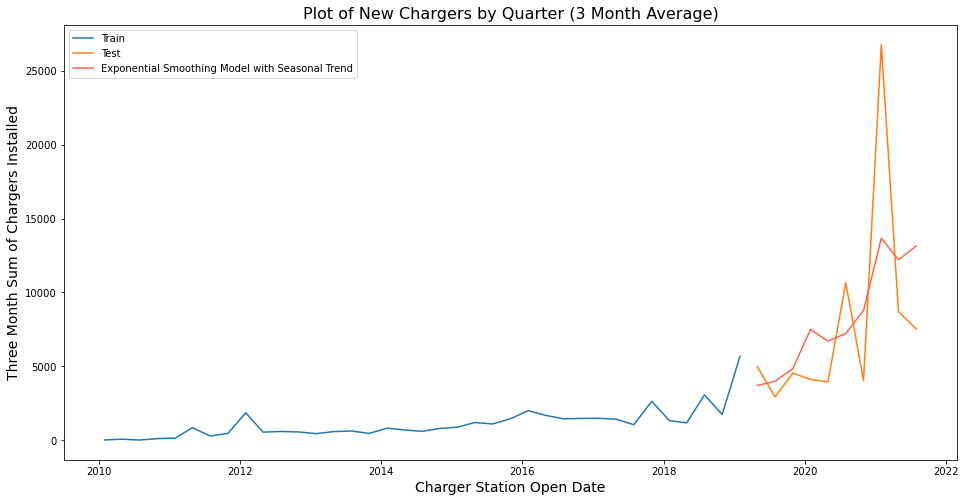

In [45]:
plt.figure(figsize=(16,8))
sns.lineplot(x='open_date', y='total_chargers', data=train)
sns.lineplot(x='open_date', y='total_chargers', data=test)
sns.lineplot(x=yhat.index, y='total_chargers', data=yhat, color='tomato')

plt.title('Plot of New Chargers by Quarter (3 Month Average)', size=16)
plt.legend(labels=['Train', 'Test', "Exponential Smoothing Model with Seasonal Trend"])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

In [46]:
eval_df = pd.DataFrame()
eval_df = md.append_eval_df(eval_df, 'Exp Smoothing', 'Quarterly Sum of New Chargers', test, yhat)
eval_df

Model Type                Target Variable    RMSE
0  Exp Smoothing  Quarterly Sum of New Chargers  5212.0

#### Results:
The RMSE was 5212 for the Holt-Winters Exponential Smoothing Model predictions verses the actual values from the test dataset. This increase is not surprising considering that the volume of new charging stations increases dramatically in the test data set over the train set. 
***

### Examining the Results by Looking at the Cumulative Sum of Charging Stations Added
In order to explore the total growth of charging stations over time I combined the train and test datasets so that I could calculate the cumulative sum. I also combined yhat (the prediction dataset) with train so that I could calculate the cumulative sum for the prediction. I then plotted the result below to compare how they differ.

In [47]:
total_ev = pd.concat([train, test])
predict_ev = pd.concat([train, yhat])

In [48]:
total_ev['rolling_total_chargers'] = total_ev.total_chargers.cumsum()
predict_ev['rolling_total_chargers'] = predict_ev.total_chargers.cumsum()

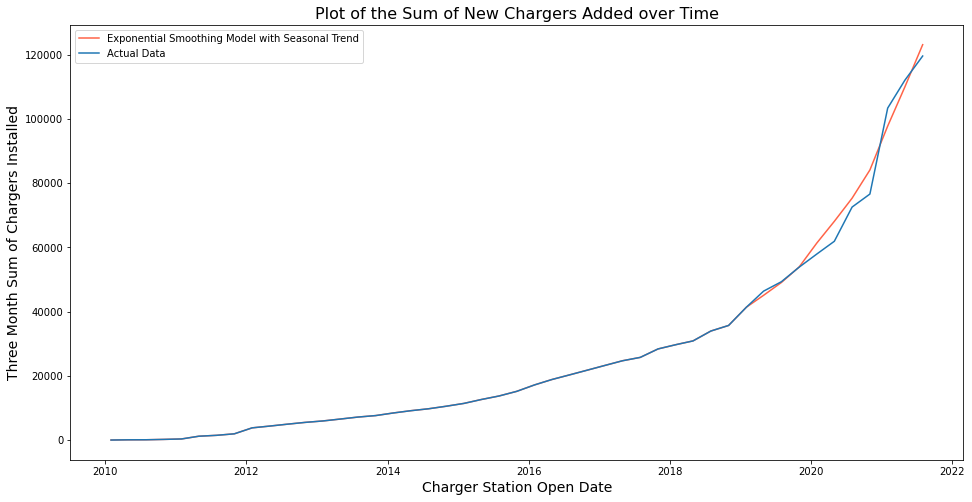

In [49]:
plt.figure(figsize=(16,8))
sns.lineplot(x=predict_ev.index, y='rolling_total_chargers', data=predict_ev, color='tomato')
sns.lineplot(x='open_date', y='rolling_total_chargers', data=total_ev)
plt.title('Plot of the Sum of New Chargers Added over Time', size=16)
plt.legend(labels=["Exponential Smoothing Model with Seasonal Trend", 'Actual Data'])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

#### Results:
Exploring the results visually by looking at the cumulative sum of charging stations being added over time, the model does seem to be a fairly good predictor up until the end of the time period where the rate of increase for the actual data seem to decrease. 

### Next Steps: Predicting into the Future
For the final step I decided to predict two years into the future. Let's see how it looks.

In [50]:
# First I found the last date of the dataset
test.tail(1)

total_chargers
open_date                 
2021-07-31            7529

In [59]:
# Then I created a dataframe that continued the quarterly interval for two years:
future_ev = pd.DataFrame({'date': pd.date_range(datetime(2021,10,31), datetime(2023,10,31), freq='3M')})
future_ev = future_ev.set_index(future_ev.date)
future_ev

date
date                 
2021-10-31 2021-10-31
2022-01-31 2022-01-31
2022-04-30 2022-04-30
2022-07-31 2022-07-31
2022-10-31 2022-10-31
2023-01-31 2023-01-31
2023-04-30 2023-04-30
2023-07-31 2023-07-31
2023-10-31 2023-10-31

#### Modeling using Holt-Winters Exponential Smoothing Model with Seasonal Trend
This time using the same model but with the entire dataframe

In [60]:
model = ExponentialSmoothing(
    ev['total_chargers'],
    seasonal_periods=4,
    trend="mul",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated"
)
model1 = model.fit(smoothing_level = .5, smoothing_slope = .2)
model2 = model.fit(smoothing_level = .7, smoothing_slope = .3)
model3 = model.fit(smoothing_level = .9, smoothing_slope = .4)

yhat_items1 = model1.predict(start = future_ev.index[0], end = future_ev.index[-1])
yhat_items2 = model2.predict(start = future_ev.index[0], end = future_ev.index[-1])
yhat_items3 = model3.predict(start = future_ev.index[0], end = future_ev.index[-1])

yhat1 = round(yhat_items1, 2)
yhat2 = round(yhat_items2, 2)
yhat3 = round(yhat_items3, 2)

In [61]:
yhat1 = pd.DataFrame(yhat1, columns=['total_chargers'])
yhat2 = pd.DataFrame(yhat2, columns=['total_chargers'])
yhat3 = pd.DataFrame(yhat3, columns=['total_chargers'])

#### Plot of Holt-Winters Exponential Smoothing Model

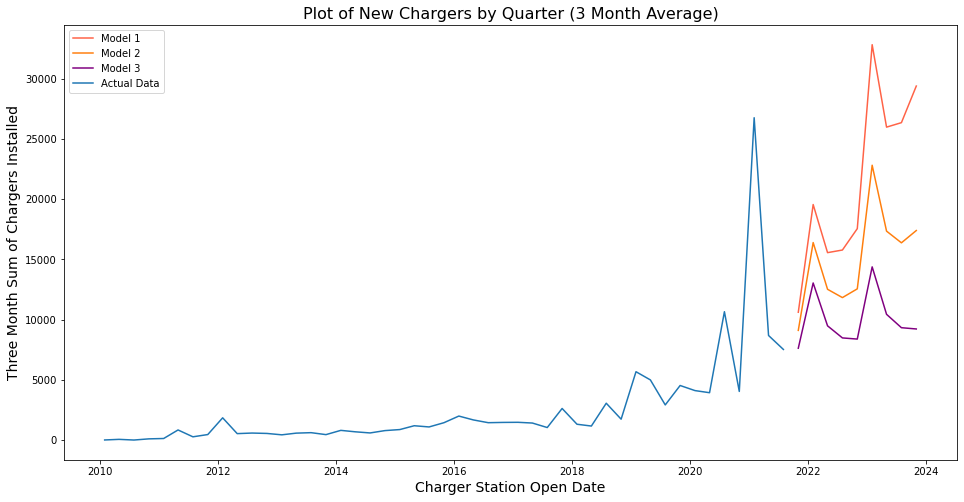

In [62]:
plt.figure(figsize=(16,8))
sns.lineplot(x=yhat1.index, y='total_chargers', data=yhat1, color='tomato')
sns.lineplot(x=yhat2.index, y='total_chargers', data=yhat2, color='tab:orange')
sns.lineplot(x=yhat3.index, y='total_chargers', data=yhat3, color='purple')
sns.lineplot(x='open_date', y='total_chargers', data=ev)

plt.title('Plot of New Chargers by Quarter (3 Month Average)', size=16)
plt.legend(labels=['Model 1', 'Model 2', 'Model 3', 'Actual Data'])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

#### Findings:
The model accounts for the rate of change of new charging stations and tappers the growth expectations. A better visualization is to again examine the cumulative sum of the actual growth along with the prediction, which is below.

#### Examining the Results by Looking at the Cumulative Sum of Charging Stations Added

In [63]:
predict_ev1 = pd.concat([ev, yhat1])
predict_ev2 = pd.concat([ev, yhat2])
predict_ev3 = pd.concat([ev, yhat3])

In [64]:
predict_ev1['rolling_total_chargers'] = predict_ev1.total_chargers.cumsum()
predict_ev2['rolling_total_chargers'] = predict_ev2.total_chargers.cumsum()
predict_ev3['rolling_total_chargers'] = predict_ev3.total_chargers.cumsum()

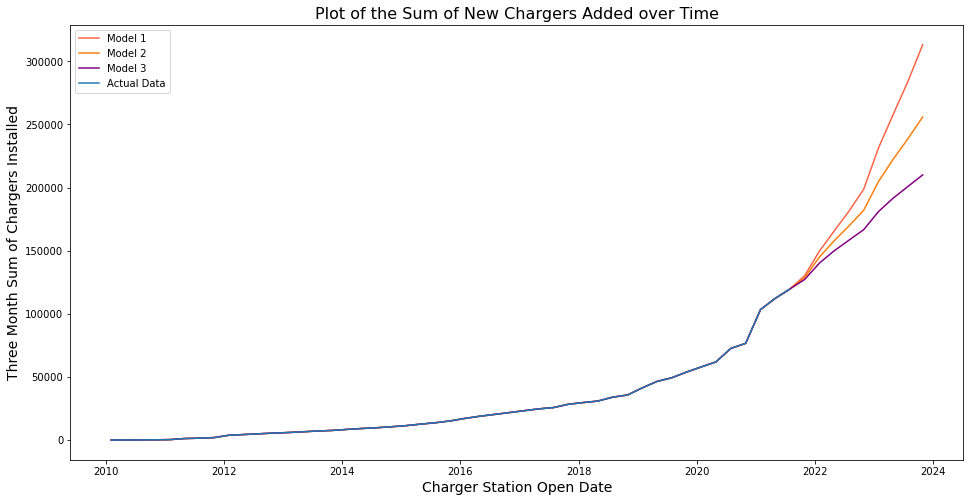

In [65]:
plt.figure(figsize=(16,8))
sns.lineplot(x=predict_ev1.index, y='rolling_total_chargers', data=predict_ev1, color='tomato')
sns.lineplot(x=predict_ev2.index, y='rolling_total_chargers', data=predict_ev2, color='tab:orange')
sns.lineplot(x=predict_ev3.index, y='rolling_total_chargers', data=predict_ev3, color='purple')

sns.lineplot(x='open_date', y='rolling_total_chargers', data=total_ev)

plt.title('Plot of the Sum of New Chargers Added over Time', size=16)
plt.legend(labels=['Model 1', 'Model 2', 'Model 3', 'Actual Data'])
plt.xlabel('Charger Station Open Date', size=14)
plt.ylabel('Three Month Sum of Chargers Installed', size=14)
plt.show()

#### Findings:
After adding the test data it significantly increases the slope, which causes the model to continue to increase its slope. Therefore, I added two other predictors that smooth the trend and put more weight on the more recent slopes. So, what exactly is the prediction? See below!

### Final Prediction: It depends...

In [66]:
print('The predicted number of EV Charger to be built over the next two years:')
print('Model 1: ', round(predict_ev1.rolling_total_chargers.max() - total_ev.rolling_total_chargers.max(), 0))
print('Model 2: ', round(predict_ev2.rolling_total_chargers.max() - total_ev.rolling_total_chargers.max(), 0))
print('Model 3: ', round(predict_ev3.rolling_total_chargers.max() - total_ev.rolling_total_chargers.max(), 0))

The predicted number of EV Charger to be built over the next two years:
Model 1:  193602.0
Model 2:  136363.0
Model 3:  90438.0


Over the past two years the U.S. has added just over 73k EV chargers to the network. Therefore, the rate of adding new EV chargers may be closer to model 3, but again this is forecasting and many factors could influence the build rate. 


### [Back to Top](#Back-to-Top)
<a id="Conclusion"></a>
***

## Final Conclusion 
Predicting into the future can be tricky, and risky, business. Just because there was a trend in the past does not necessarily mean that a trend will continue into the future. In the case of Electric Vehicles, the technology behind these vehicles continues to change and progress on a regular basis. There are also environmental and political factors that heavily affect this business. Technology or legislation could be introduced at any time that would changes the rate of adding new charging stations to the US network. However, if the rate remains similar to the near past, then the Holt-Winters Exponential Smoothing Model proved to be a good predictor of future growth of EV chargers. The formula behind the model accounts for changes in rate of growth while not being overly sensitive to rapid changes in rate. It worked well for this situation, and I look forward to seeing how accurate the prediction becomes over time. 

#### Dashboard
I visually represented a portion of these findings on a [dashboard](https://public.tableau.com/app/profile/jeff.akins/viz/StateofEVChargersInfrastructurewithintheUS/EVDashboard) using Tableau. 

#### Next Steps
I plan to explore the other features of the dataset especially on pricing and public access to the charging stations.


### [Back to Top](#Back-to-Top)
<a id="Final-Thoughts"></a>
***

## Questions

### [Back to Top](#Back-to-Top)
<a id="Questions"></a>
***